In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import wim_labels as wim

C:\Users\USER\AppData\Local\Temp\ipykernel_568\1226040708.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Check the data length

In [3]:
import os

def count_files_in_folder(folder_path):
    """
    Args:
        folder_path (_type_): folder path
        
    Count files in folder with folder path
    """
    try:
        # Get the list of files in the folder
        files = os.listdir(folder_path)

        # Filter out directories (consider only files)
        files = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]

        # Print the count of files
        print(f"Number of files in '{folder_path}': {len(files)}")
    except FileNotFoundError:
        print(f"Folder '{folder_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [50]:
folder_to_check = 'final_yolo_dataset/train/images'
count_files_in_folder(folder_to_check)
folder_to_check = 'final_yolo_dataset/train/labels'
count_files_in_folder(folder_to_check)
folder_to_check = 'final_yolo_dataset/val/images'
count_files_in_folder(folder_to_check)
folder_to_check = 'final_yolo_dataset/val/labels'
count_files_in_folder(folder_to_check)
folder_to_check = 'final_yolo_dataset/test/images'
count_files_in_folder(folder_to_check)
folder_to_check = 'final_yolo_dataset/test/labels'
count_files_in_folder(folder_to_check)

Number of files in 'final_yolo_dataset/train/images': 1153
Number of files in 'final_yolo_dataset/train/labels': 1153
Number of files in 'final_yolo_dataset/val/images': 288
Number of files in 'final_yolo_dataset/val/labels': 288
Number of files in 'final_yolo_dataset/test/images': 482
Number of files in 'final_yolo_dataset/test/labels': 482


# Assert img-label names are same

In [ ]:
import os

def get_files(folder_path):
    try:
        # Get the list of files in the folder
        files = os.listdir(folder_path)

        # Filter out directories (consider only files)
        files = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]

        return files
    except FileNotFoundError:
        print(f"Folder '{folder_path}' not found.")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

def compare_file_names(images_folder, labels_folder):
    # Get file names from 'images' folder
    images_files = get_files(images_folder)

    # Get file names from 'labels' folder
    labels_files = get_files(labels_folder)

    # Extract base names (ignore file format extension) for comparison
    images_base_names = {os.path.splitext(file)[0] for file in images_files}
    labels_base_names = {os.path.splitext(file)[0] for file in labels_files}

    # Compare base names
    common_base_names = images_base_names.intersection(labels_base_names)

    # Print common base names
    print("Common base names between 'images' and 'labels' folders:")
    for base_name in common_base_names:
        print(base_name)

    # Print the count of common base names
    print(f"\nNumber of name maching: {len(common_base_names)}")

# Replace 'path/to/images' and 'path/to/labels' with the actual folder paths you want to compare
images_folder_path = 'new_dataset/images'
labels_folder_path = 'new_dataset/labels'

compare_file_names(images_folder_path, labels_folder_path)


All good :)

# Visualize Object Frequency

In [44]:
def count_classes_in_yolo_folder(folder_path_list):
    class_counts = {}  # Dictionary to store class counts

    for folder_path in folder_path_list:
        for filename in os.listdir(folder_path):
            if filename.endswith(".txt"):
                file_path = os.path.join(folder_path, filename)

                with open(file_path, 'r') as file:
                    for line in file:
                        elements = line.strip().split()

                        if elements:
                            class_index = int(elements[0])

                            class_counts[class_index] = class_counts.get(class_index, 0) + 1
    return class_counts

def plot_label_freq(folder_path_list, threshold = 500, label_on = True, ascending = True):
    class_counts = count_classes_in_yolo_folder(folder_path_list)

    if label_on:
        final_dict = {}
        wim_labels = wim.labels
        for idx in class_counts.keys():
            class_name = wim_labels[idx]
            final_dict[class_name] = class_counts[idx]
    else:
        class_counts = {str(key): value for key, value in class_counts.items()}
        final_dict = class_counts

    df = pd.DataFrame(list(final_dict.items()), columns=['Class Name', 'Count'])
    df = df.sort_values(by='Count', ascending=ascending)
    colors = ['pink' if count < threshold else 'skyblue' for count in df['Count']]
    plt.figure(figsize=(12, 8))
    bars = plt.barh(df['Class Name'], df['Count'], color=colors)
    plt.xlabel('Count')
    plt.ylabel('Class Name')
    plt.title('Class Counts (Horizontal Bar Plot with Conditional Coloring)')

    plt.legend([bars[0]], [f'Count < {threshold}'], loc='upper right')

    plt.tight_layout()
    plt.show()
    print(f"Label Frequency in {folder_path_list}")
    print("All the labels are encoded to class indexes due to the privacy concerns.")
    return df

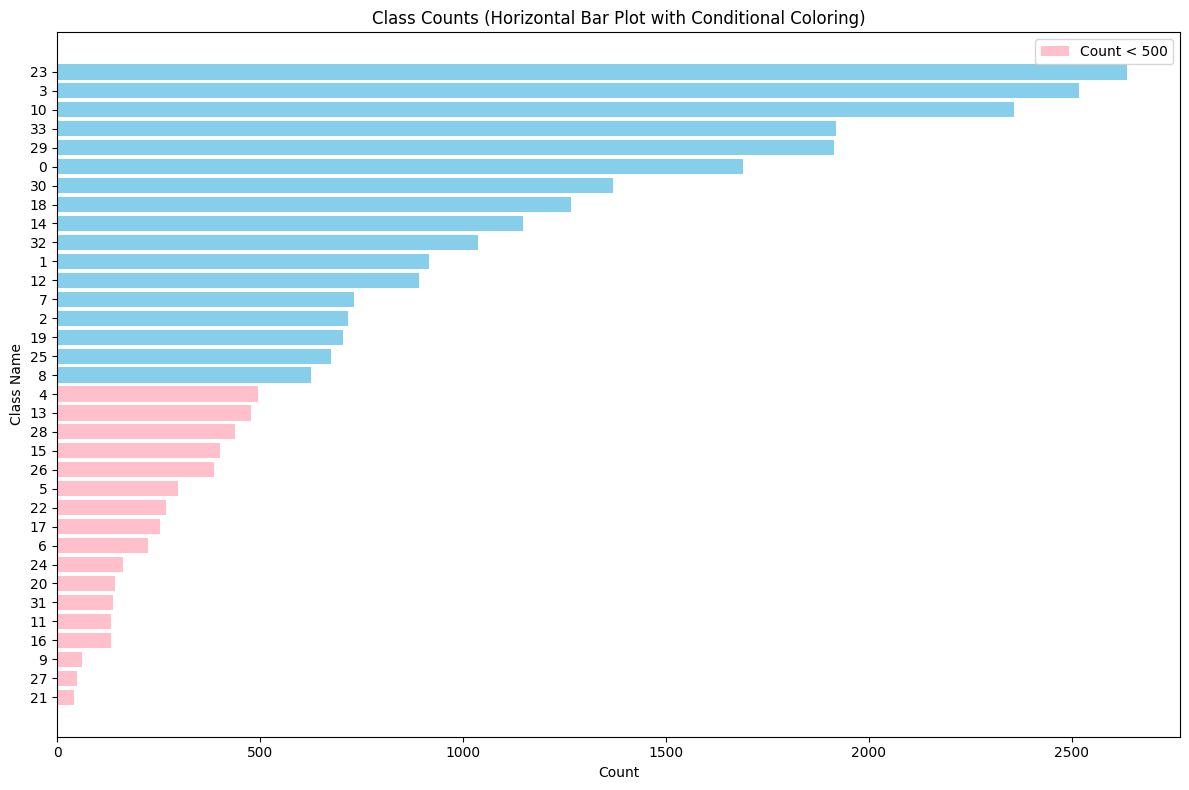

Label Frequency in ['d:\\yolo_backup\\raid\\coss07\\yolov8\\yolov8\\final_yolo_dataset\\train\\labels', 'd:\\yolo_backup\\raid\\coss07\\yolov8\\yolov8\\final_yolo_dataset\\val\\labels', 'd:\\yolo_backup\\raid\\coss07\\yolov8\\yolov8\\final_yolo_dataset\\test\\labels']
All the labels are encoded to class indexes due to the privacy concerns.


In [45]:
root = "d:\\yolo_backup\\raid\\coss07\\yolov8" # change with your root path
train_label_path = os.path.join(root, 'yolov8', 'final_yolo_dataset', 'train', 'labels')
val_label_path = os.path.join(root,'yolov8', 'final_yolo_dataset', 'val', 'labels')
test_label_path = os.path.join(root, 'yolov8', 'final_yolo_dataset', 'test', 'labels')

folder_path_list = [train_label_path, val_label_path, test_label_path]
df = plot_label_freq(folder_path_list, label_on=False)




In [35]:
df.sort_values(by='Count', ascending=False)[:10]

,Class Name,Count
2,23,2635
6,3,2517
13,10,2357
31,33,1920
20,29,1914
8,0,1689
32,30,1371
9,18,1266
16,14,1147
30,32,1037


In [36]:
df.sort_values(by='Count', ascending=True)[:10]

,Class Name,Count
28,21,41
29,27,49
26,9,62
23,16,132
21,11,132
33,31,137
24,20,144
0,24,162
10,6,225
27,17,253


# check the test result

In [42]:
df

,Class Name,Count
28,21,41
29,27,49
26,9,62
23,16,132
21,11,132
33,31,137
24,20,144
0,24,162
10,6,225
27,17,253


# Validation Matrix Visualization

In [11]:
import eval_YOLO as eval

model_list = ["runs/detect/train28/weights/best.pt"] # runs/detect 안에 있는 train 번호만 찾아서 바꿔 돌리세요 
results = []
for i in model_list:
    rst, matrix = eval.yolo_valid(i)
    results.append(rst)

matrix

Device: cuda
Current cuda device: 0
Count of using GPUs: 1


Ultralytics YOLOv8.0.202 🚀 Python-3.9.18 torch-2.1.0+cu121 CUDA:0 (NVIDIA RTX A6000, 48677MiB)
Model summary (fused): 268 layers, 68156310 parameters, 0 gradients, 257.6 GFLOPs
val: Scanning /raid/coss07/yolov8/yolov8/Dataset_bind_16_17_21_24_25_26_27_29_31_32_7_20_28_deleted/test/labels.cache... 482 images, 0 backgrounds, 0 corrupt: 100%|██████████| 482/482 [00:00<?, ?it/s]
/raid/coss07/anaconda3/envs/yolov8/lib/python3.9/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:22<00:0

array([[        302,          12,          33, ...,           0,           0,         151],
       [          4,         170,           2, ...,           0,           0,          65],
       [         20,           1,          68, ...,           0,           0,          92],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,         432,          80],
       [         24,           6,          25, ...,           0,          18,           0]])

# Get segmented img

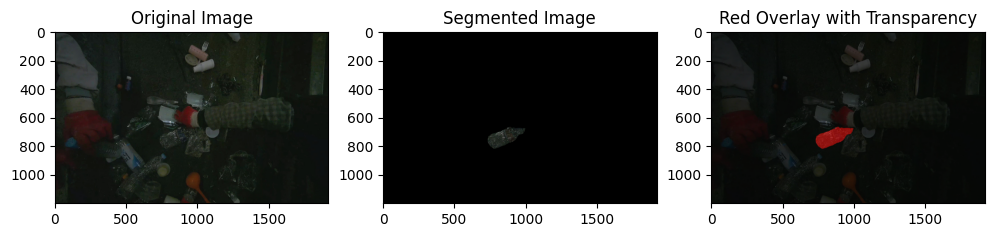

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image and mask
original_image = cv2.imread('orig.jpeg')
mask_image = cv2.imread('mask.png', cv2.IMREAD_GRAYSCALE)

# Threshold the mask to create a binary mask (0 and 255 become 0 and 1)
_, binary_mask = cv2.threshold(mask_image, 127, 1, cv2.THRESH_BINARY)

# Apply the binary mask to the original image
segmented_image = original_image.copy()
segmented_image[binary_mask == 0] = [0, 0, 0]  # Set non-masked pixels to black

# Convert the binary mask to 3 channels for overlaying with a red color
overlay_mask = cv2.merge([binary_mask * 0, binary_mask * 0, binary_mask * 255])  # Red color

# Overlay the segmented mask on the original image with transparency
alpha = 0.5
result = cv2.addWeighted(original_image, 1 - alpha, overlay_mask, alpha, 0)

# Display the result
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(segmented_image)
plt.title('Segmented Image')

plt.subplot(133)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Red Overlay with Transparency')

# Save the result image
cv2.imwrite('output_image_red_overlay.jpg', result)

plt.show()
